<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W9_FRI_31_03_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
from keras.saving.legacy.save import load_model
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


Vật này là:  [96]


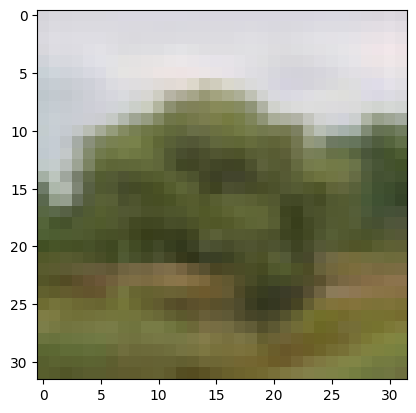

In [ ]:
digit = x_train[999]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('Vật này là: ', y_train[999])

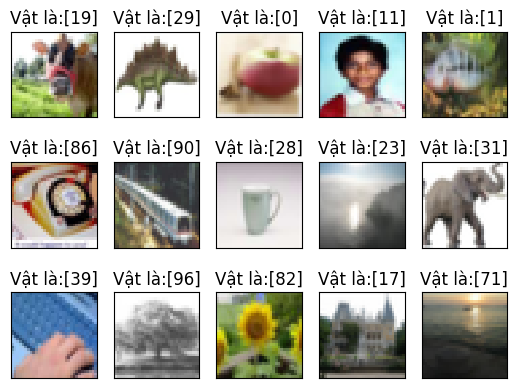

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray',
             interpolation='none')
  plt.title('Vật là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(5000,activation='relu',input_shape=(32*32*3,)))  
model.add(Dense(100,activation='Softmax')) #output
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5000)              15365000  
                                                                 
 dense_5 (Dense)             (None, 100)               500100    
                                                                 
Total params: 15,865,100
Trainable params: 15,865,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical   
y_train = to_categorical(y_train, num_classes = 100)
y_test = to_categorical(y_test, num_classes = 100)

print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  
              metrics=['accuracy']) 
model.fit(x_train,y_train,epochs=10,batch_size=128)   
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 4.7430 - accuracy: 0.0704
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 3.7392 - accuracy: 0.1327
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 3.5845 - accuracy: 0.1612
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 3.4818 - accuracy: 0.1819
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 3.4046 - accuracy: 0.1949
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 3.3426 - accuracy: 0.2071
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 3.2930 - accuracy: 0.2192
Epoch 8/10
391/391 [==============================] - 2s 6ms/step - loss: 3.2421 - accuracy: 0.2268
Epoch 9/10
391/391 [==============================] - 2s 6ms/step - loss: 3.2009 - accuracy: 0.2338
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 3.5329 - accuracy: 0.1976

In [ ]:
model.save('test_cifa100.h5')

In [25]:
model100 = load_model('test_cifa100.h5')

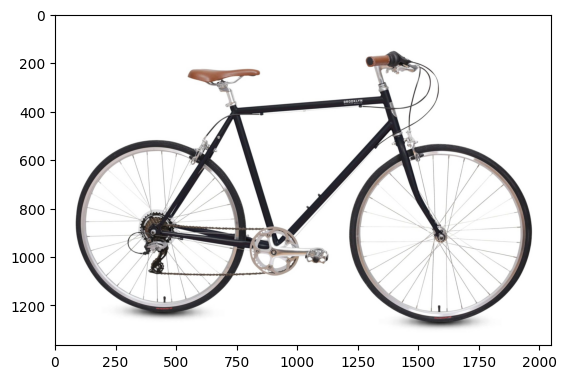

In [26]:
img = plt.imread('bicycle.jpg')
plt.imshow(img)
plt.show()

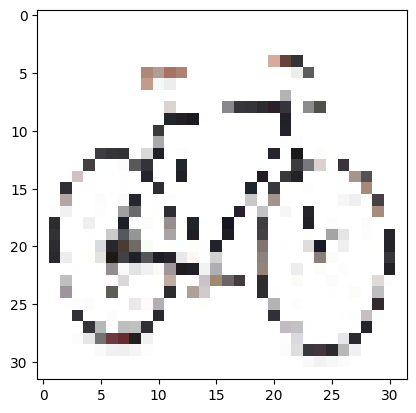

1/1 [==============================] - 0s 79ms/step


array([23])

In [28]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('bicycle.jpg', target_size = (32,32))  #target_size: chỉnh kích thước ảnh mong muốn

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255

plt.imshow(img.reshape(32,32,3))
plt.show()

np.argmax(model.predict(img),axis = -1)